<a href="https://colab.research.google.com/github/nurfnick/Calculus_1/blob/main/Python/Project_Part2_Limits_Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 2:  Hints and Tips

I am going to load all the packages I think I'll need here first.

In [1]:
import numpy as np
from sympy import *

## Limits

Computing a limit is fairly straight forward using `sympy`

In [2]:
from sympy.core.numbers import Infinity
x = symbols('x')

f = (3*x**2-2)/(5*x**2+x-4)

limit(f,x,Infinity())

3/5

Above I computed an infinite limit!
$$
\lim_{x\to\infty}\frac{3x^2-2}{5x^2+x-4}
$$

Sometimes for the limit we are interested in the precise definition.  When we say that 
$$
\lim_{x\to\infty}f(x) = L
$$
We mean that for every $\epsilon>0$ there exists an $M>0$ such that when $x>M$, then  $|f(x)-L|<\epsilon$.

If we were given $\epsilon = 0.1$, how would we find the $M$ that permits us to be within that tollerance?  Essentially this is asking:

$$
\left|\frac{3x^2-2}{5x^2+x-4}-\frac35\right|<\frac1{10}
$$

To do this, I'll attempt to solve the equality not the inequality!  I'll solve it for both the positive value $\frac1{10}$ and the negative value $-\frac1{10}$.

In [ ]:
solve(f-7/10,x)

[-2.14568322948010, 0.745683229480096]

In [ ]:
solve(f-5/10,x)

[0.0, 1.00000000000000]

There are four solutions here, we need to interpret the correct one.  We wanted $M$ to be positive so that eliminates two of them.  Next I want to take just the largest one since I want this to work for all values after.  If I take the smaller, there is a spot where it might break.  So $M=1$.  Let's numerically check!

In [ ]:
f.subs(x,1)-3/5

-0.100000000000000

In [ ]:
f.subs(x,.745683229)-3/5

0.0999999985360309

We see that 0.1 appearing in both of these.  Let's check that for the rest of time the difference stays small!

In [ ]:


for i in range(1,10000,1000):#this tests from 1 to 10,000 in steps of 1,000
  print(abs(f.subs(x,i)-3/5)<.1)

True
True
True
True
True
True
True
True
True
True


All above are true so I have shown that the limit works!  Be careful about getting the right number for your $M$ or $\delta$!

## Derivatives 

These aren't terrible either!

In [ ]:
f.diff(x)

6*x/(5*x**2 + x - 4) + (-10*x - 1)*(3*x**2 - 2)/(5*x**2 + x - 4)**2

This is the derivative.  I could check it by doing the limit!

$$
f'(a) = \lim_{x\to a}\frac{f(x)-f(a)}{x-a}
$$

In [ ]:
a = symbols('a')

limit((f-f.subs(x,a))/(x-a),x,a).simplify()

(3*a**2 - 4*a + 2)/(25*a**4 + 10*a**3 - 39*a**2 - 8*a + 16)

In [ ]:
f.diff(x).simplify()

(3*x**2 - 4*x + 2)/(25*x**4 + 10*x**3 - 39*x**2 - 8*x + 16)

These do agree after adding the `.simplify()` command!

## Equation of the Tangent Line

If I wanted the equation of the tangent line, I could find,
$$
y = m(x-x_0)+y_0
$$
where $m = f'(x_0)$.

So taking my equation above and using $x_0 = 1$.

In [3]:
line = f.diff(x).subs(x,1)*(x-1)+f.subs(x,1)

line

x/4 + 1/4

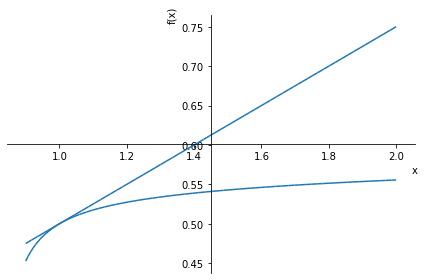

In [6]:
from sympy.plotting import plot

plot(f,line , (x,0.9,2))

We see that at 1 it comes in and just touches the graph!